In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
mind = pd.read_csv('raw_mindwave.csv').set_index('time').drop(columns=['raw', 'attention', 'meditation'])
muse = pd.read_csv('raw_muse.csv').set_index('time').drop(columns=['raw'])

mind.index = pd.to_datetime(mind.index)
muse.index = pd.to_datetime(muse.index)

mind_df = mind.groupby([mind.index.minute, mind.index.second, mind.index.microsecond//1e5]).mean()
muse_df = muse.groupby([muse.index.minute, muse.index.second, muse.index.microsecond//1e5]).mean() ** 2 # <<============ เพิ่งเพิมใน muse

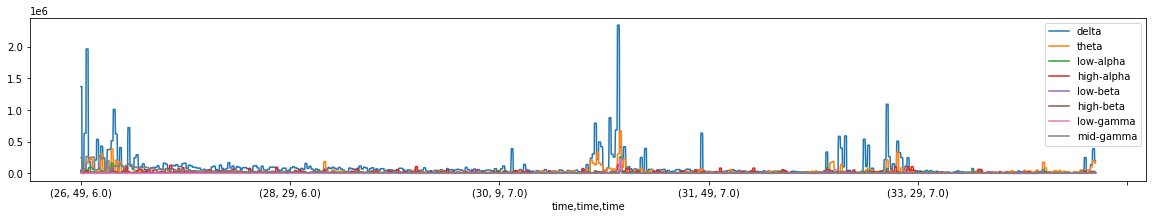

In [111]:
mind_df.plot(figsize=(20, 3))

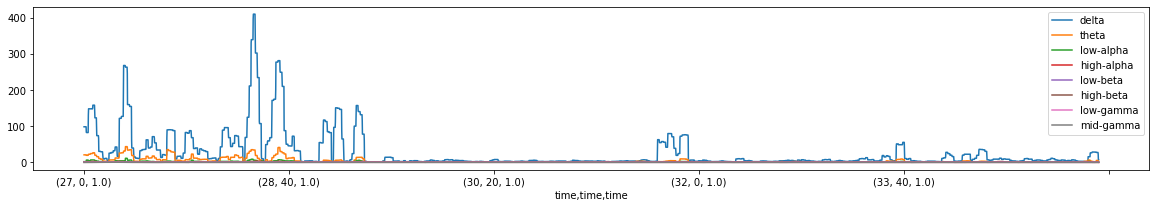

In [112]:
muse_df.plot(figsize=(20, 3))

In [113]:
from scipy.optimize import fmin, minimize
from scipy.stats import normaltest

def _func(c, array): 
    return np.abs(np.std(array ** (1/c)) - 1)

def calculate_c(array):
    res = fmin(_func, 1, args=(array,), disp=0)
    return res[0]

def get_c_array(df):
    return [calculate_c(df[col]) for col in df.columns]

def normalize(df):
    return df ** get_c_array(df)

mind_df = normalize(mind_df)
muse_df = normalize(muse_df)

mind_df = mind_df - mind_df.mean()
muse_df = muse_df - muse_df.mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016294A0DD30>,
      dtype=object)

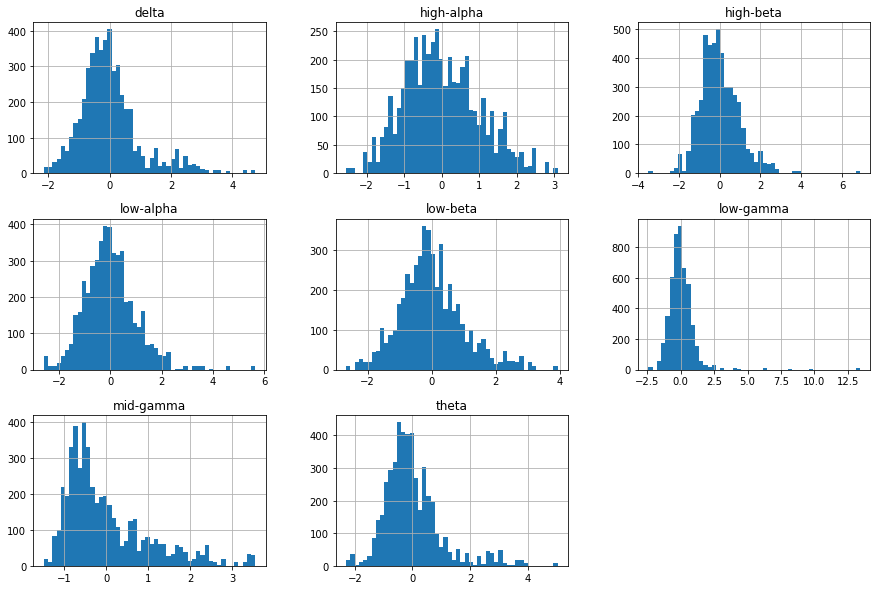

In [114]:
mind_df.hist(bins=50, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016292CCFFD0>,
      dtype=object)

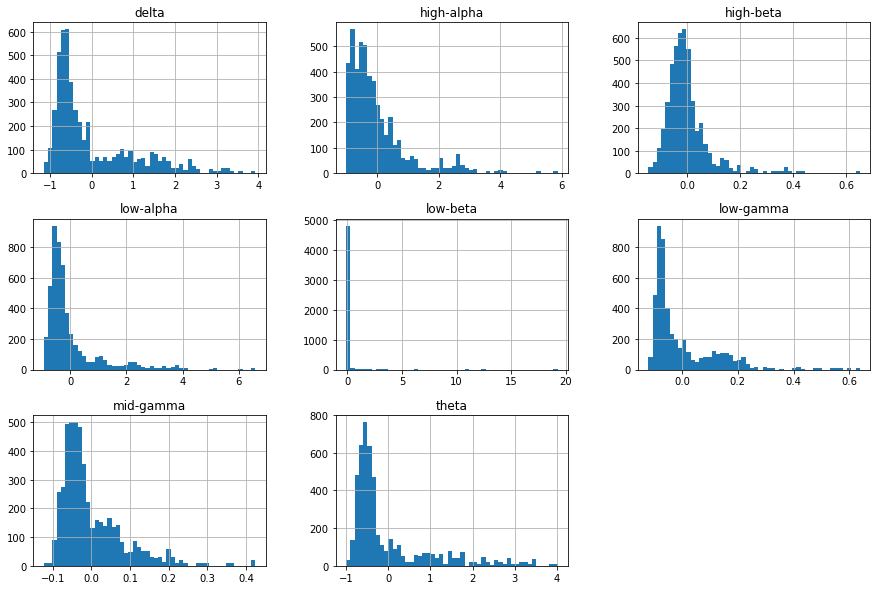

In [115]:
muse_df.hist(bins=50, figsize=(15, 10))

In [116]:
# def map(muse_band, mind_band):
#     z = (muse_band - muse_band.mean())/muse_band.std(ddof=0)
#     return z * mind_band.std(ddof=0) + mind_band.mean()

# for col in muse_df.columns:
#     muse_df[col] = map(muse_df[col], mind_df[col])

In [117]:
# muse_df.hist(bins=50, figsize=(15, 10))

In [118]:
# new = pd.DataFrame()
# new['muse'] = np.exp(muse_df).mean()
# new['mindwave'] = np.exp(mind_df).mean()
# new.plot(figsize=(10, 5))

In [119]:
# new = pd.DataFrame()
# new['mindwave'] = mind_df.reset_index(drop=True).raw
# new['muse'] = muse_df.reset_index(drop=True).raw
# new.mindwave = new.mindwave - new.mindwave.mean()
# new.muse = new.muse - new.muse.mean()
# new.plot(figsize=(20, 10))

delta         4.523198e+00
theta         4.075099e+00
low-alpha     4.269009e+00
high-alpha    4.805439e+00
low-beta      4.173752e+00
high-beta     4.505101e+00
low-gamma     9.594803e-12
mid-gamma     4.454801e+00
dtype: float64